# **Reflex**
 Существуют разные фреймворки для создания веб-сайтов с красивым графическим интерфейсом, такие как Flet, Dear PyGui, Reflex. Сегодня мы поговорим про Reflex. Reflex - open-source библиотека, позволяющая легко и быстро создавать-веб сайты.

Этот доклад поможет разобраться с основами фреймворка и мы на примере создадим мини вебсайт, чтобы показать все удобство и мощь фреймворка Reflex. (К сожалению, код в ноутбуке нельзя запустить, но в конце будет ссылка на гитхаб с созданным веб сайтом)


Ключевые *преимущества Reflex*:


### 1. No html and js:
- Одним из самых главных плюсов библиотеки является то, что для создания веб приложения не понадобиться знание продвинутых фреймворков для создания фронтенда, ни html, ни javascript, использование библиотеки очень просто и интуитивно, без ущерба в производительности и кастомизируемости

### 2. Backend and Frontend
- Библиотека позволяет одновременно создавать как бекэнд, так и фронтенд, то есть для создания веб-приложения достаточно всего лишь знание фреймворка и языка Python

### 3. React
 - В фреймворке добавлена возможность оборачивать существующие сторонние компоненты React.

### 4. DataBase
- Интеграция с базами данных одной строкой кода (ORM from Reflex), хранение и управление данными осуществляется очень просто



---


# Основные инструменты

### Установка
- установка фреймворка производится через pip install reflex
- для создания проекта в нужной папке нужно прописать reflex init, после этого будет сгенерирован начальный шаблон проекта
- запуск осуществляется командой reflex run

## Использование
### State

`class State(rx.State)` - определяет все переменные, которые могут меняться. Внутри этого класса также определяются функции, event handlers, которые меняют заданные переменные. Вызываться такие функции могут любыми действмиями пользователя, например, по клику



In [ ]:
class ExampleState(rx.State):
    colors: List[str] = [
        "black",
        "red",
        "green",
        "blue",
        "purple",
    ]

    # индекс текущего цвета
    index: int = 0

    def next_color(self):
        self.index = (self.index + 1) % len(self.colors)

    @rx.var
    def color(self) -> str:
        return self.colors[self.index]


def index():
    return rx.heading(
        "Hello there!",
        on_click=ExampleState.next_color,
        color=ExampleState.color,
        _hover={"cursor": "pointer"},
    )

color - является изменяемой переменной в ExampleState, все переменные обновляются автоматически, как только меняется состояние

next_color - event handler, эта функция вызывается при каком-либо действии, в нашем случае, on_click

**Пример: счетчик**

In [ ]:
class ButtonState(rx.State):
    count: int = 0

    def increment(self):
        self.count += 1

    def decrement(self):
        self.count -= 1


def index():
    return rx.hstack(
        rx.button(
            "Decrement",
            bg="#fef2f2",
            color="#b91c1c",
            border_radius="lg",
            on_click=ButtonState.decrement,
        ),
        rx.heading(
            ButtonState.count,
            font_size="2em",
            padding_x="0.5em",
        ),
        rx.button(
            "Increment",
            bg="#ecfdf5",
            color="#047857",
            border_radius="lg",
            on_click=ButtonState.increment,
        ),
    )


app = rx.App()
app.add_page(index)
app.compile()

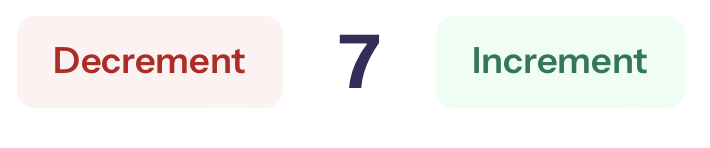

при нажатии increment - счетчик увеличивается на 1, при decrement - уменьшается

### Index
def index()

Функция отвечающая за создание фронтенда для главной страницы.
Функция должна вернуть набор компонент, которые могут быть вложены друг в друга для создания сложного визуала. В Reflex есть множество готовых компонент, которые можно использовать. Если же чего-то не хватает, то с легкостью можно создать свою компоненту используя React


In [ ]:
def index():
    return rx.text("Сreated first element in page!")

## Components
поговорим поподробнее про разные виды компонент, их очень много, основные из них:


**Text**

Для вывода какого-либо текста достаточно создать следующую компоненту: ```rx.text("Happy!")```

Помимо текста есть возможность создания заголовков: **headings** ```rx.heading("Splendid!")```
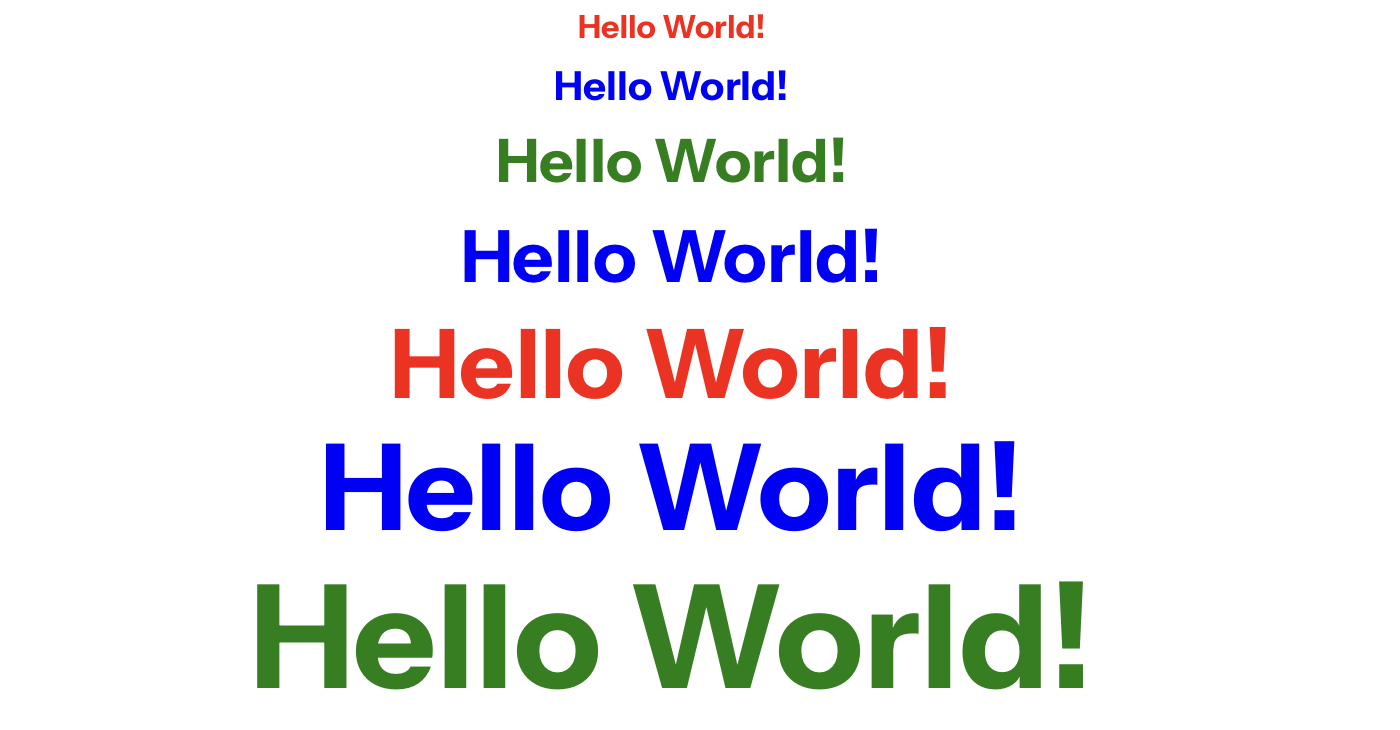



Можно добавить стиль тексту, используя параметр as_:


*   b: Жирный
*   i: Italic
* mark: Выделение
* small: текст поменьше

In [ ]:
rx.vstack(
    rx.text("Hello World!", as_="i"),
    rx.text("Hello World!", as_="s"),
    rx.text("Hello World!", as_="mark"),
    rx.text("Hello World!", as_="sub"),
)

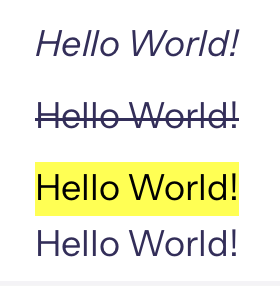

**Кнопки**



создать кнопку можно разных размеров, стилей. Код создания примитивной кнопки выглядит так:

```
rx.button("Сlick and get cookies", bg="lightblue", color="black", size="sm")
```



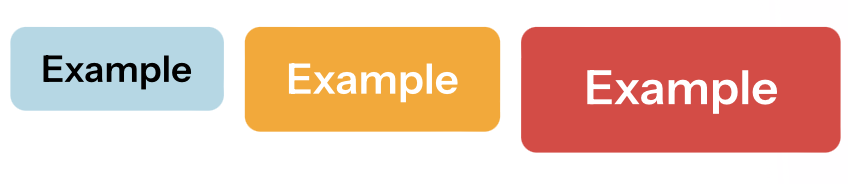

**Stack**

Stack - один из контейнеров в Reflex, нужен для группировки разных компонент. Бывает два вида: vstack - группировка по вертикали, и hstack - по горизонтали


Пример использования:




In [ ]:
rx.hstack(
    rx.box(
        "Box is another container", bg="red", border_radius="md", width="10%"
    ),
    rx.box(
        "used to store elements",
        bg="orange",
        border_radius="md",
        width="10%",
    ),
    rx.box(
        "very convenient",
        bg="yellow",
        border_radius="md",
        width="10%",
    )
    width="100%",
)

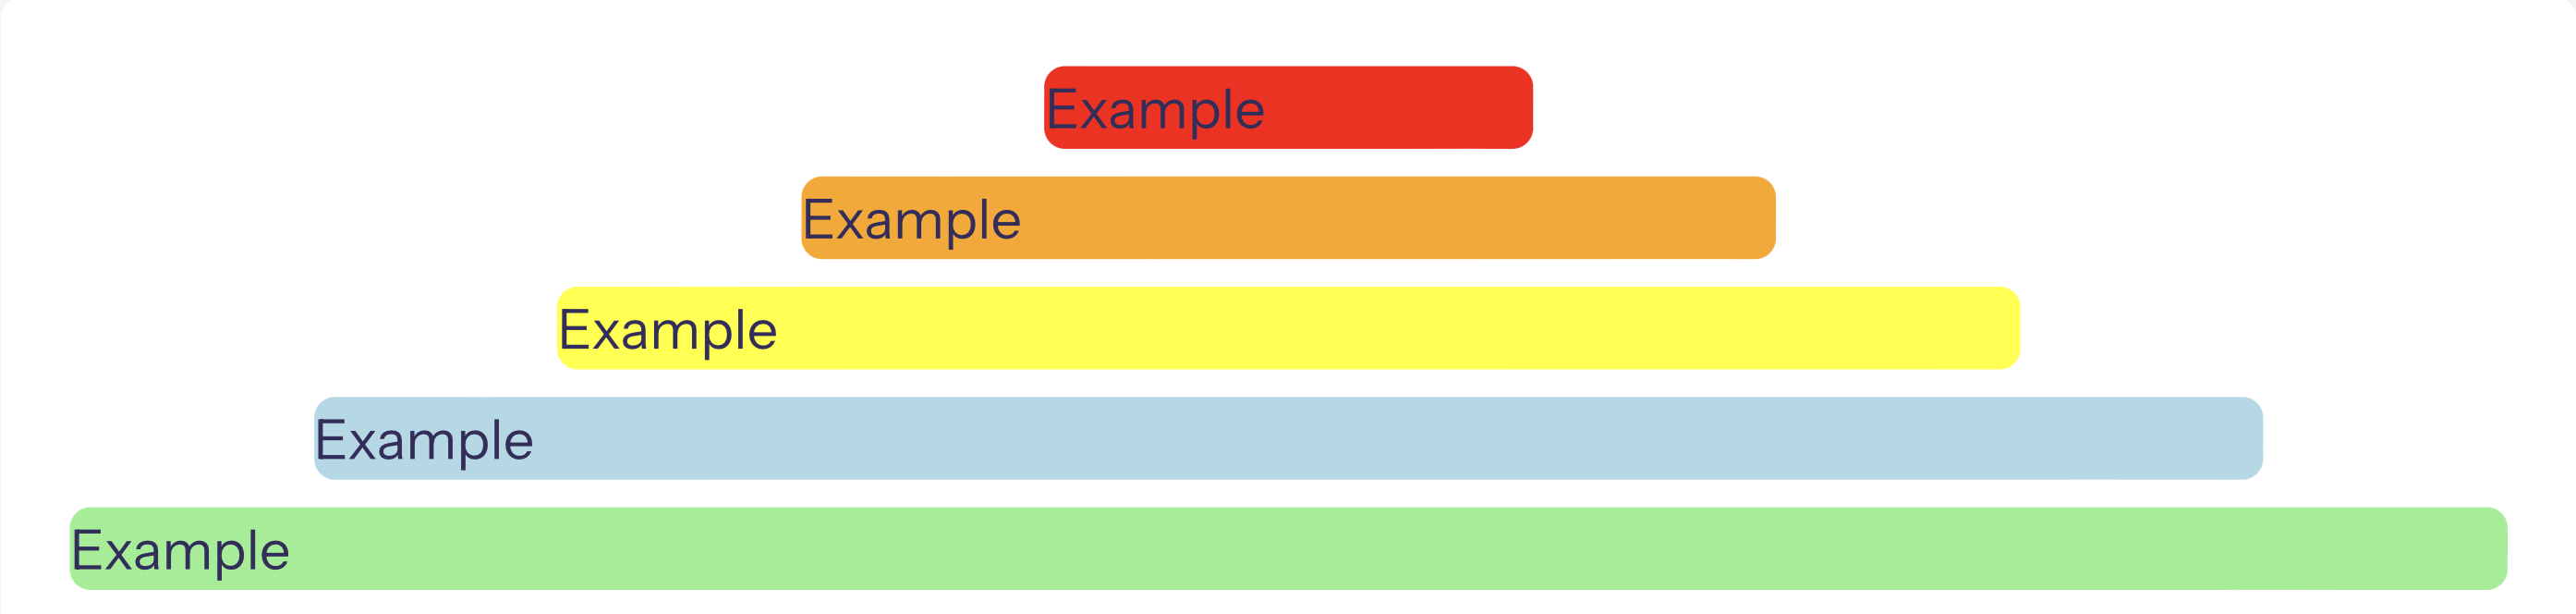

### Графики

есть множество видов графиков. Рассмотрим для примера LineChart:



```rx.recharts.line()``` создает саму прямую, data_key - ключ, по которому мы ищем значение



```rx.recharts.x_axis(data_key="name")``` -  значение по которому будут отслеживаться наши изменения данных на оси X

In [ ]:
rx.recharts.line_chart(
    rx.recharts.line(
        data_key="pv",
        stroke="#8884d8",
    ),
    rx.recharts.line(
        data_key="uv",
        stroke="#82ca9d",
    ),
    rx.recharts.x_axis(data_key="name"),
    rx.recharts.y_axis(),
    data=data,
)

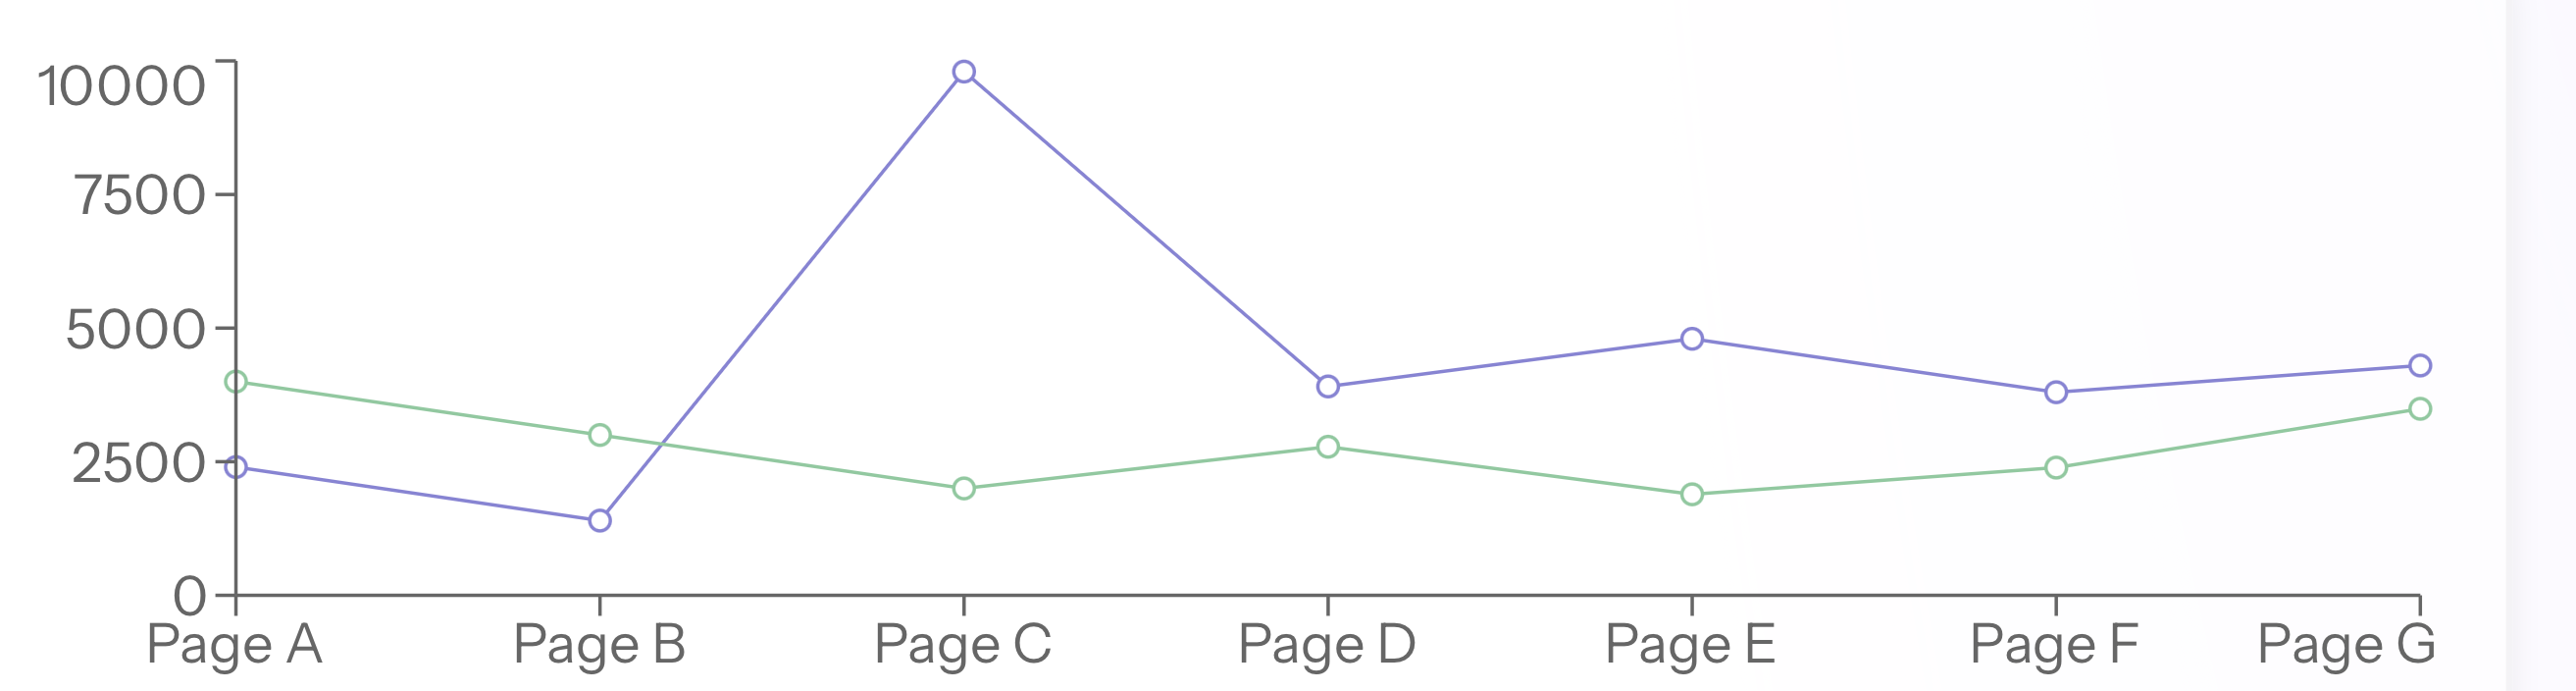

PieChart

In [ ]:
rx.recharts.pie_chart(
    rx.recharts.pie(
        data=data01,
        data_key="value",
        name_key="name",
        cx="50%",
        cy="50%",
        fill="#8884d8",
        label=True,
    )
)

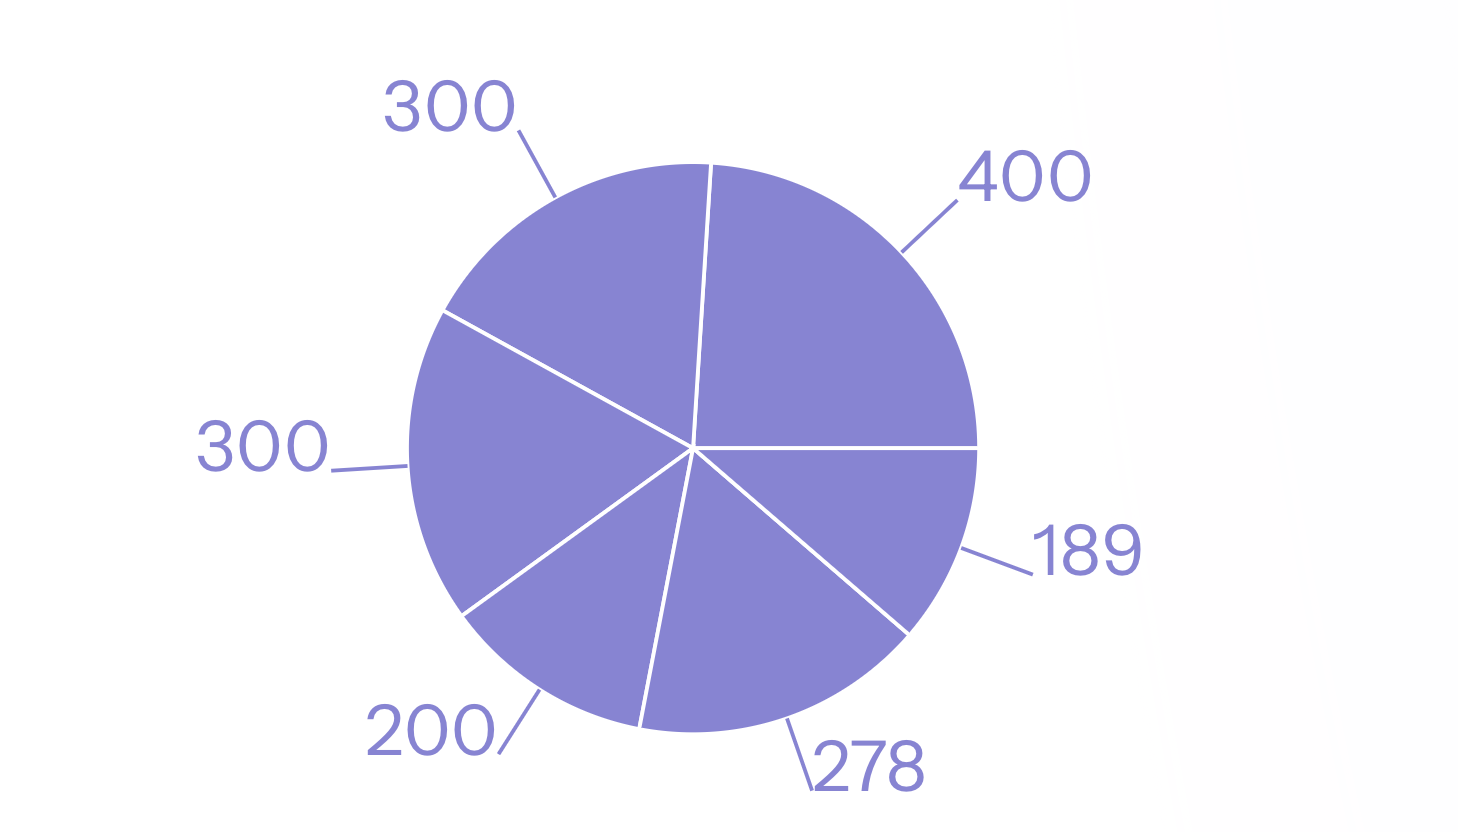

BarChart

In [ ]:
rx.recharts.bar_chart(
    rx.recharts.bar(
        data_key="uv", stroke="#8884d8", fill="#8884d8"
    ),
    rx.recharts.x_axis(data_key="name"),
    rx.recharts.y_axis(),
    data=data,
)

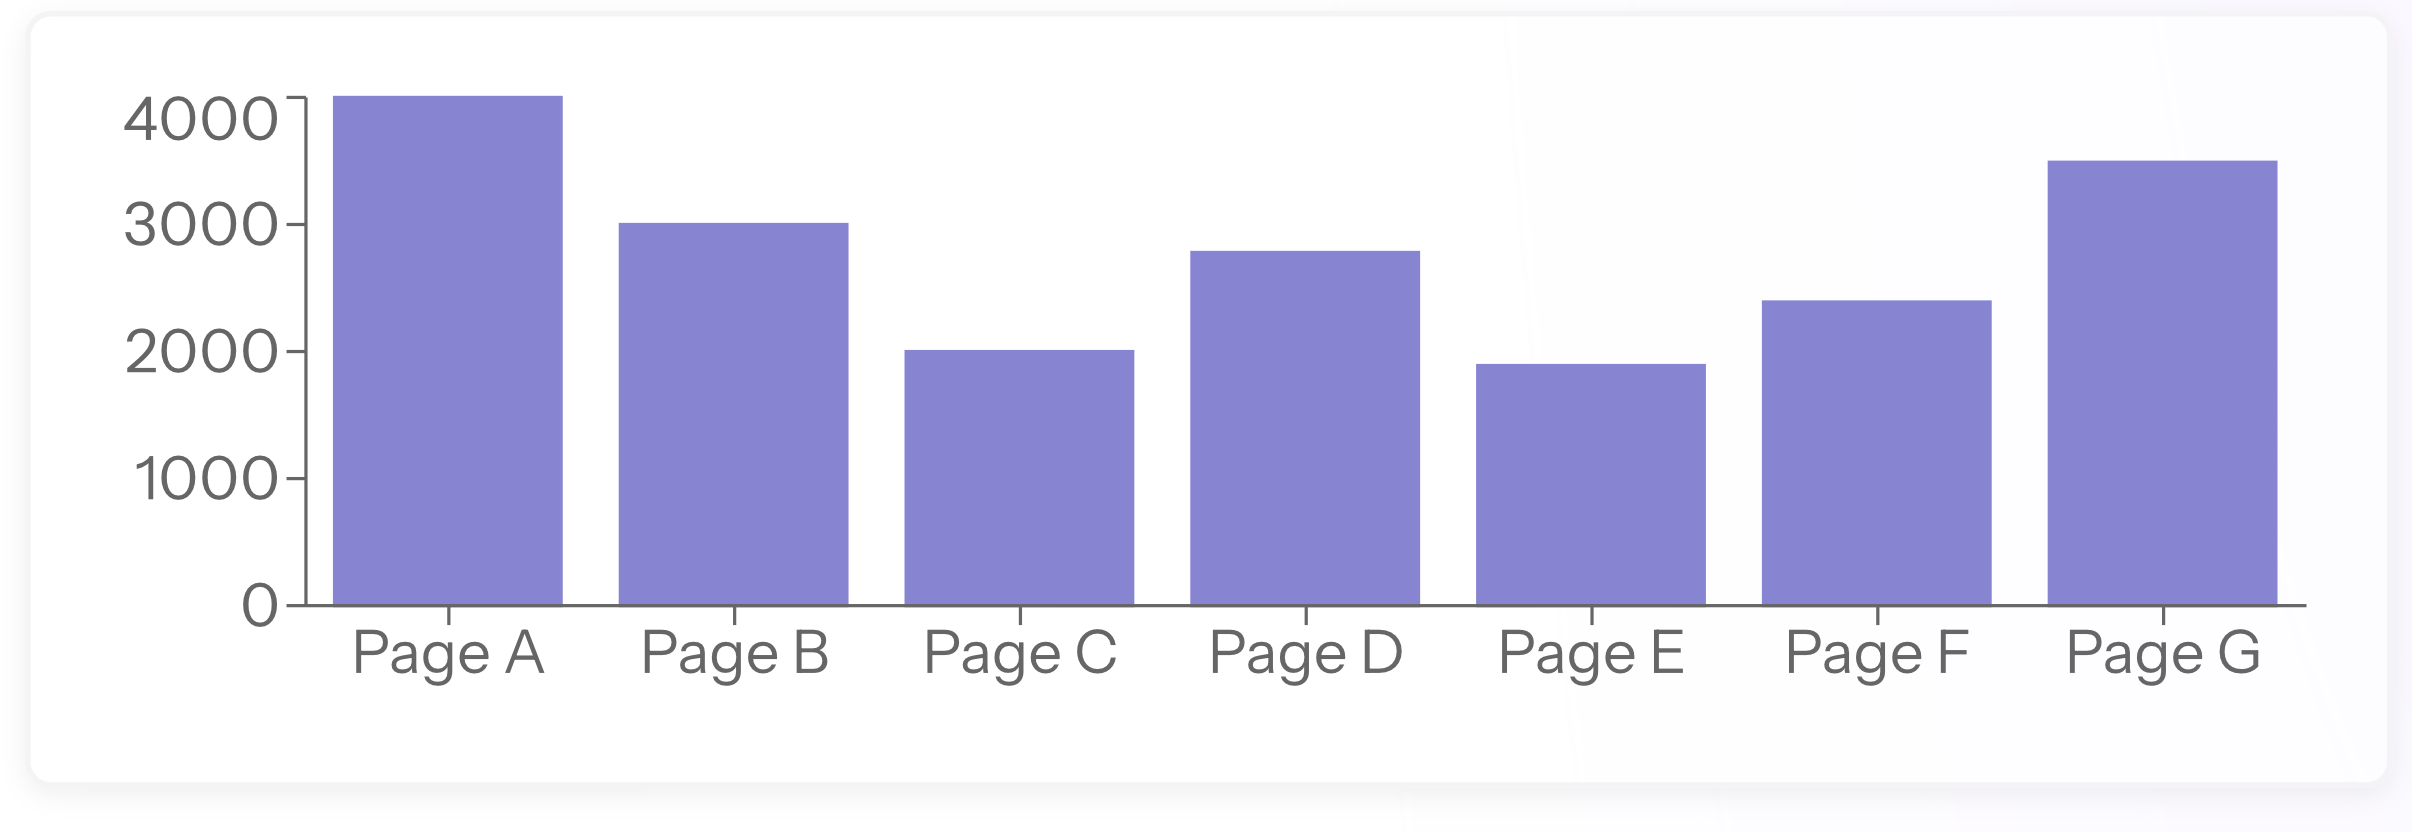

## Pages
Добавление страниц просиходит либо с помощью метода app.add_page(), либо с помощью декоратора @rx.page():


In [ ]:
app = rx.App()

def index():
    return rx.text("Root Page")

@rx.page(route="/custom-route")
def custom():
    return rx.text("Custom Page with route")

app.add_page(index, route="/")
app.add_page(custom)

## DataBase
Reflex предоставляет встроенную базу данных SQLite для хранения и извлечения данных. Можно подключиться к собственной SQL-совместимой базе данных, изменив файл rxconfig.py с указанием url базы данных.


In [ ]:
config = rx.Config(
    app_name="my_app",
    db_url="sqlite:///reflex.db",
)

### Создание таблицы

Для создания таблицы нужно создать класс, который будет наследоваться от rx.Model, и указать значение ```table=True```



In [ ]:
class User(rx.Model, table=True):
    username: str
    email: str

### Запросы
Для запроса к базе данных можно создать сессию - rx.session(), которая обрабатывает открытие и закрытие соединения с базой данных.
Для запросов к базе дынных можно использовать обычные запросы SQLAlchemy

In [ ]:
with rx.session() as session:
    session.add(
        User(
            username="Shrek",
            email="its3am@gotosleep.com",
        )
    )
    session.commit()

# Cоздадим свой веб-сайт

Чтобы лучше понять, как все компоненты взаимодействуют друг с другом, попробуем создать веб-сайт на примере:

1. Добавим изображение профиля по центру экрана

In [ ]:
# создаем картинку
rx.center(
        rx.image(
            src='space_cat.JPG',
            width = "168px",
            height = "168px",
            border_radius = "50%",
            margin_bottom="8px"
        ),
        padding_top = "36px",
        width = "100vw"
    )

rx.image() отвечает за отображение картинки, rx.center() - контейнер, все элементы в нем выравниваются по центру. Далее добавляются настройки css для изображения, width, height - ширина и высота изображения, padding_top - отступ сверху

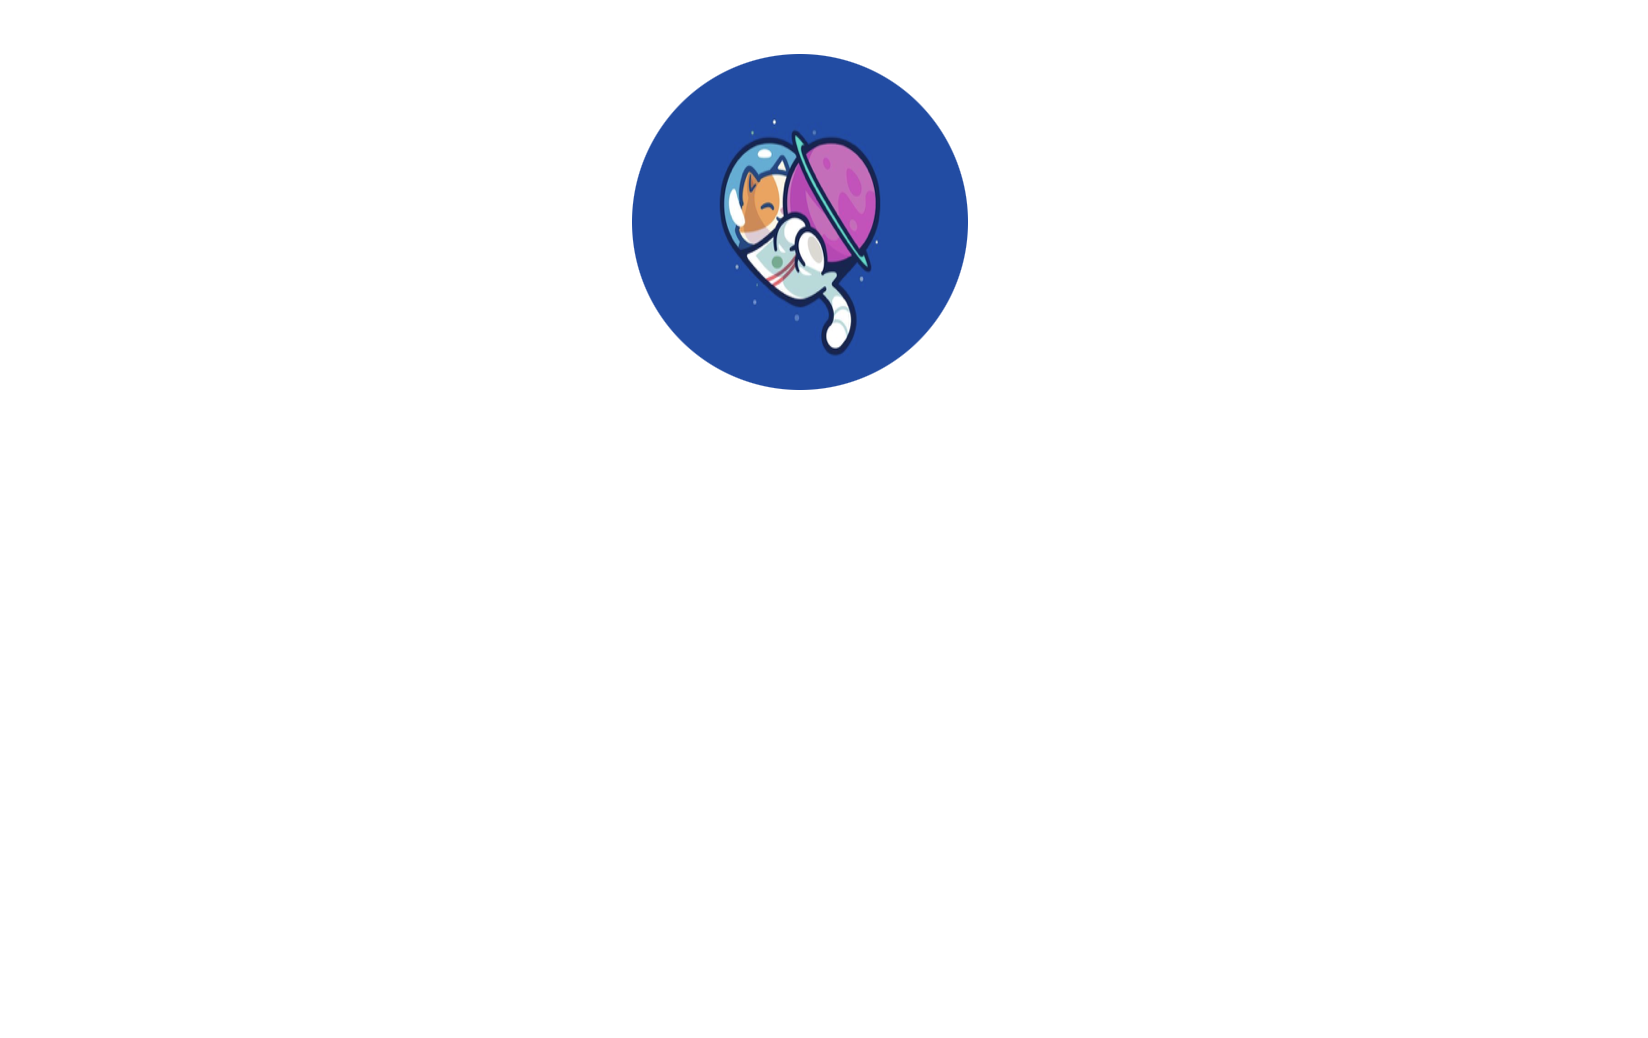

2. Добавим цвет фона

In [ ]:
rx.box(
        rx.center(
        rx.image(
            src='space_cat.JPG',
            width = "168px",
            height = "168px",
            border_radius = "50%",
            margin_bottom="8px"
        ),
        padding_top = "36px",
        width = "100vw"
        ),
        bg = "linear-gradient(160deg, rgba(103, 151, 193,255),rgba(225, 156, 162, 255))",
        width = "100vw",
        height = "100vw"
    )

rx.box() создает новый контейнер, внутри которого мы задаем цвет фона и его настройки. bg - задает цвет фона, я использую градиент и указываю какие будут использованы цвета

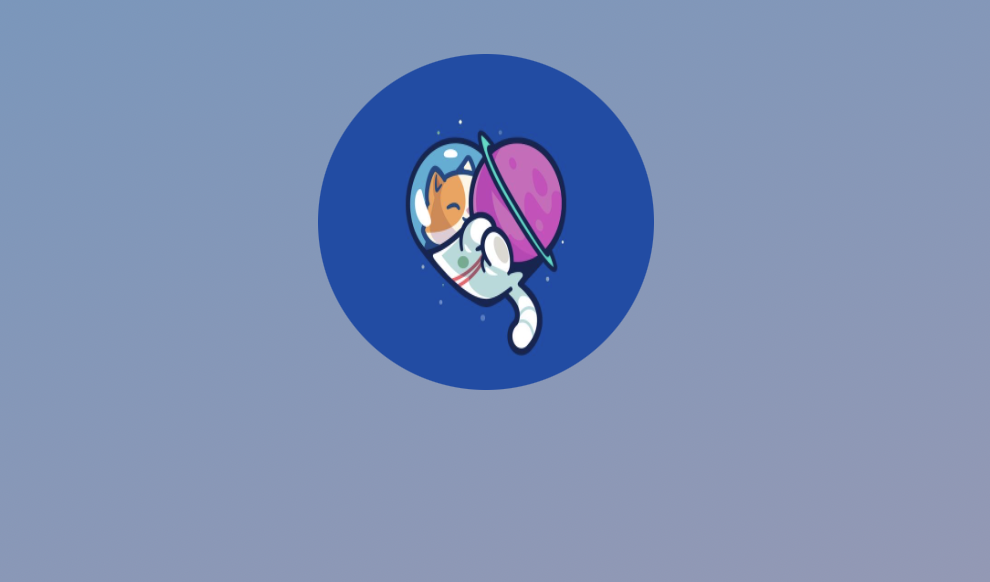

3. Добавим текст

In [ ]:
rx.text(
            "Space Cat",
            font_weight="700",
            font_size="36px",
            line_height='1.5cm',
            font_family = "DM Sans",
            text_align = "center",
            width = "100%",
            color = "rgb(255, 255, 255)",
            padding_bottom = '3px'
        )


4. Создадим функцию генерации кнопок:

In [ ]:
def create_button(link, text, img):
    return rx.link(
        rx.hstack(
            rx.image(
                src=img,
                width="30px"
            ),
            rx.text(text,
                    font_size="20px",
                    font_weight="500",
                    font_family="DM Sans",
                    text_align="center",
                    color='#57618A',
                    width="calc(100% - 80px)"
                    ),
            padding="9px 7px",
            width="95vw",
            max_width="700px",
            border="1px solid rgb(128, 160, 201)",
            border_radius="5px",
            bg='white',
            box_shadow="rgb(128 160 201) 8px 8px 0px 0px",

            _hover={
                "cursor": "pointer",
                "translate": "4px 4px",
                "box shadow": "rgb(128 160 201) 4px 4px Opx Opx"
            }

        ),
        href=link,
        _hover={}
    )

rx.link() отвечает за создание ссылки, которую мы указываем в параметре href. hstack() создает горизонтальный контейнер, в который мы помещаем картинку rx.image(), текст кнопки rx.text() и задаем дополнительные параметры для красоты: border_radius - скругление, box_shadow отвечает за тень

5. Добавим кнопки, сгруппируем их и добавим к остальным компонентам

In [ ]:
rx.vstack(
                    create_button('your link1', "hello, human!", "earth.png"),
                    create_button('link2', "space travel", "another_planet.png"),
                    spacing="0.9em"
                ),

vstack() группирует элементы по вертикали и создает отступ между ними, используя параметр spacing

**Итоговый результат**:


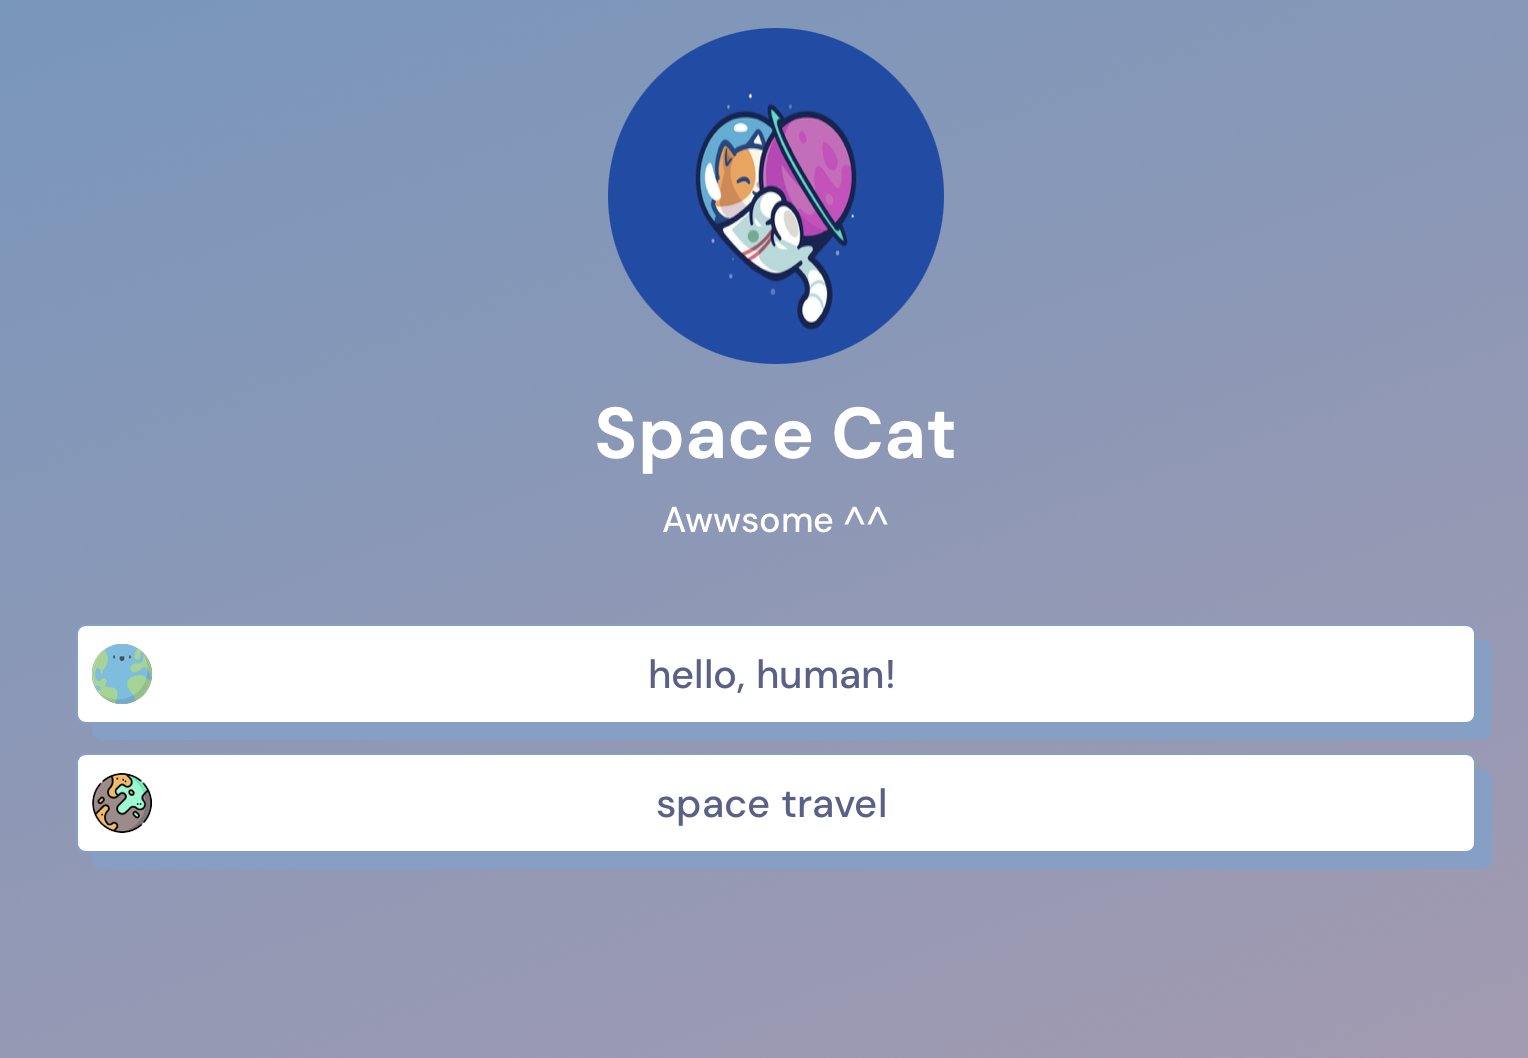

готовый код лежит в [гитхабе](https://github.com/roegic/website_reflex)



---


# Заключение

Думаю, что, посмотрев на код, ни у кого не останется сомнений, что этот фреймворк очень прост для освоения новичкам, более того,  документация на сайте очень понятная и легко читаемая, что делает знакомство с фреймворком еще более приятным. Можно создать очень удобное и красивое приложения, затратив минимум времени и усилий.

Библиотека постоянно развивается, в ее открытом roadmap, сейчас запланировано много крутых фич, направленных на улучшение производительности и не только. Одной из таких запланированных идей является создание уже готовых шаблонов, сгенерированных AI, чтобы облегчить разработку и не создавать всё с чистого листа

Прежде всего, фреймворк нацелен на использование людьми, которые хотят быстро сделать небольшой проект для своих целей, например визуализировать какие-то данные, создать личную страницу и т. д. Например, сайт фреймворка reflex.dev полностью разработан на этой библиотеке, возможности Reflex выглядят впечатляюще! Советую всем попробовать эту библиотеку в деле :)



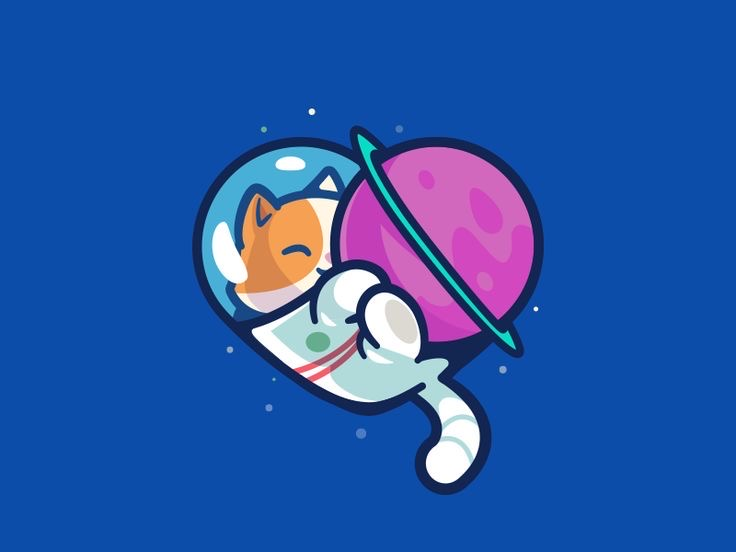